#1. File upload

face_cascade_name = 'haarcascade_frontalface_alt.xml'

eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

file_name = 'obama_01.jpeg, obama_02.jpeg, obama_01.jpg'


In [1]:
from google.colab import files
files.upload()

Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg


{'haarcascade_eye_tree_eyeglasses.xml': b'<?xml version="1.0"?>\n<!--\n    Tree-based 20x20 frontal eye detector with better handling of eyeglasses.\n    Created by Shameem Hameed (http://umich.edu/~shameem)\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain th

In [2]:
!ls -al

total 1480
drwxr-xr-x 1 root root   4096 Mar  8 09:36 .
drwxr-xr-x 1 root root   4096 Mar  8 09:35 ..
drwxr-xr-x 4 root root   4096 Mar  1 14:35 .config
-rw-r--r-- 1 root root 601661 Mar  8 09:36 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root 676709 Mar  8 09:36 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root   9532 Mar  8 09:36 obama_01.jpeg
-rw-r--r-- 1 root root   5172 Mar  8 09:36 obama_02.jpeg
-rw-r--r-- 1 root root 194499 Mar  8 09:36 obama_03.jpg
drwxr-xr-x 1 root root   4096 Mar  1 14:35 sample_data


#2. load File

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [28]:
file_name = 'obama_01.jpeg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [6]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [29]:
#-- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)    
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)    

In [30]:
img = cv2.imread(file_name)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

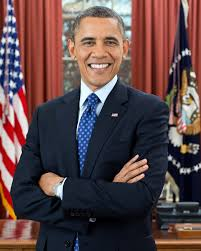

In [32]:
cv2_imshow(img)

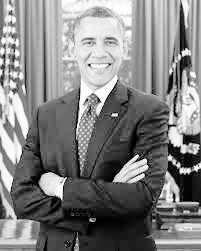

In [33]:
cv2_imshow(gray)

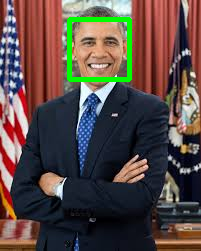

In [34]:
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faceROI = gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2, y2, w2, h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2+h2)*0.25))
        img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)

cv2_imshow(img)